# Using Age to Predict Social Media User Purchase

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

## Data Analysis of Age Feature

In [10]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

print('----------------------------------------------------------')

#Data about Age Column
print(data['Age'].describe())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
----------------------------------------------------------
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


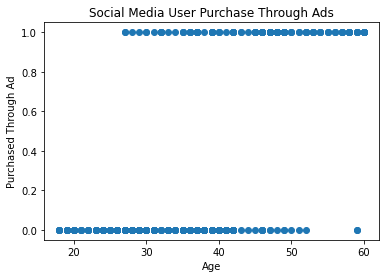

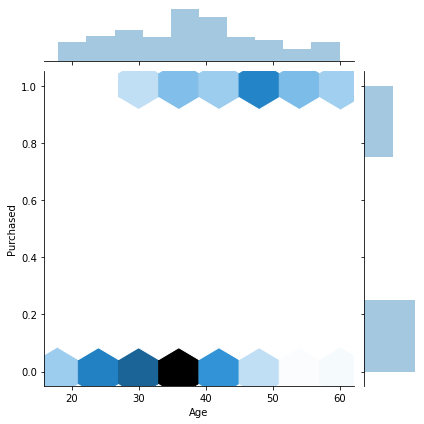

In [11]:
#Visualize data with scatter plot
plt.scatter(data['Age'], data['Purchased'])
plt.xlabel('Age')
plt.ylabel('Purchased Through Ad')
plt.title('Social Media User Purchase Through Ads')
plt.show()

sns.jointplot(x = data['Age'], y = data['Purchased'], data = data, kind = 'hex')

In [12]:
#Split data
X_training_set, X_testing_set, y_training_set, y_testing_set = train_test_split(data['Age'], data['Purchased'], test_size = 0.15, random_state = 0)

## Perceptron Model Using Age to Predict if Social Media User Purchased Item Through Ad

Accuracy of Perceptron Model: 0.25


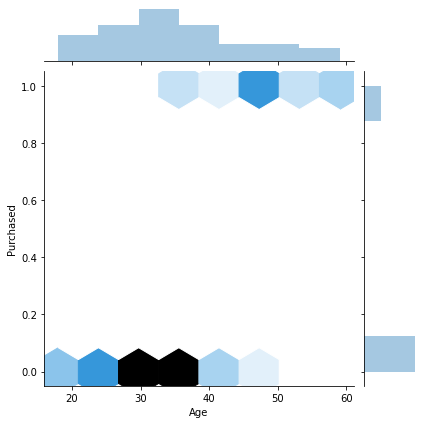

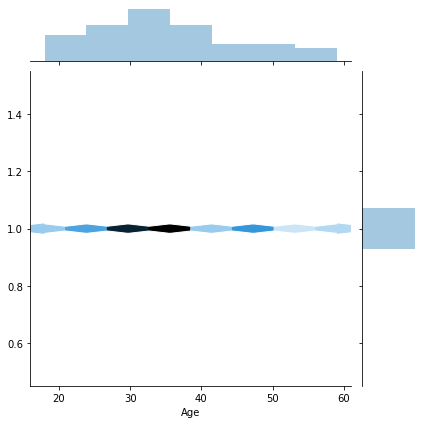

In [13]:
perceptron_classifier = Perceptron(random_state = 0)
perceptron_classifier.fit(X_training_set.values.reshape(-1, 1), y_training_set)
perceptron_prediction = perceptron_classifier.predict(X_testing_set.values.reshape(-1, 1))

sns.jointplot(x = X_testing_set, y = y_testing_set, data = data, kind = 'hex')
sns.jointplot(x = X_testing_set, y = perceptron_prediction, data = data, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of Perceptron Model: {}'.format(accuracy_score(y_testing_set, perceptron_prediction)))

## Logistic Regression Model Using Age to Predict if Social Media User Purchased Item Through Ad

Accuracy of Logistic Regression Model: 0.95


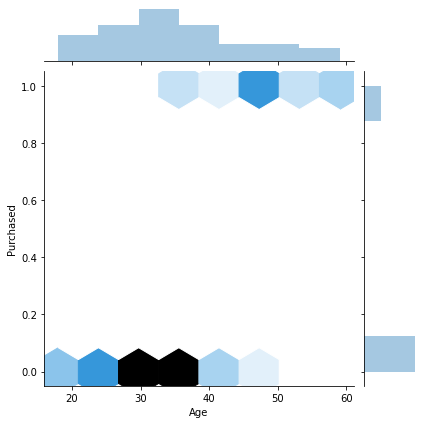

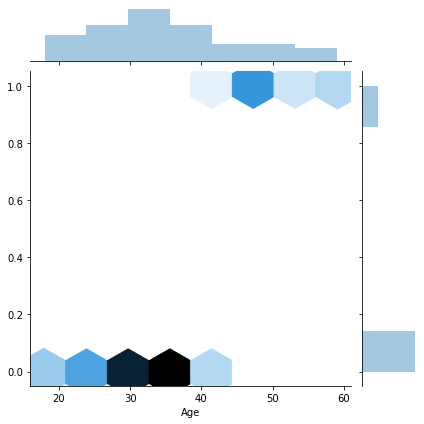

In [14]:
log_reg = LogisticRegression(solver = 'liblinear', random_state = 0)

log_reg.fit(X_training_set.values.reshape(-1, 1), y_training_set)
lr_prediction = log_reg.predict(X_testing_set.values.reshape(-1, 1))

sns.jointplot(x = X_testing_set, y = y_testing_set, data = data, kind = 'hex')
sns.jointplot(x = X_testing_set, y = lr_prediction, data = data, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of Logistic Regression Model: {}'.format(accuracy_score(y_testing_set, lr_prediction)))

## SVM Model Using Age to Predict if Social Media User Purchased Item Through Ad

Accuracy of SVM Model: 0.95


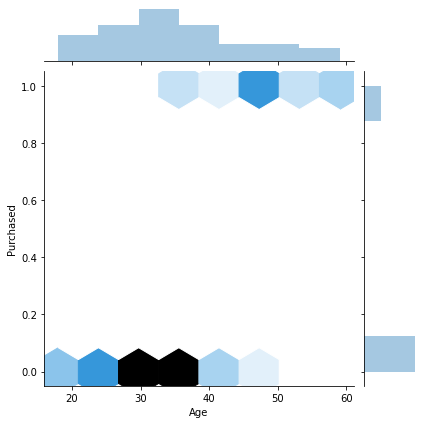

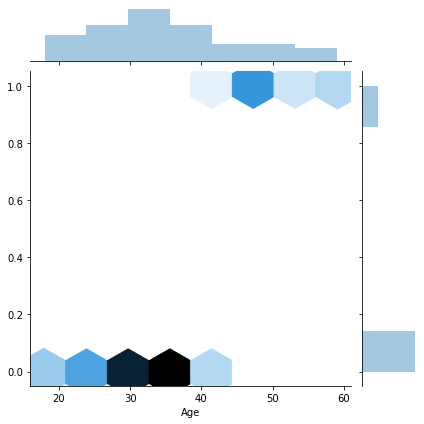

In [15]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_training_set.values.reshape(-1, 1), y_training_set)
svm_prediction = svm_classifier.predict(X_testing_set.values.reshape(-1, 1))

sns.jointplot(x = X_testing_set, y = y_testing_set, data = data, kind = 'hex')
sns.jointplot(x = X_testing_set, y = svm_prediction, data = data, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of SVM Model: {}'.format(accuracy_score(y_testing_set, svm_prediction)))

## Decision Tree for Age

Accuracy of Decision Tree Model: 0.9


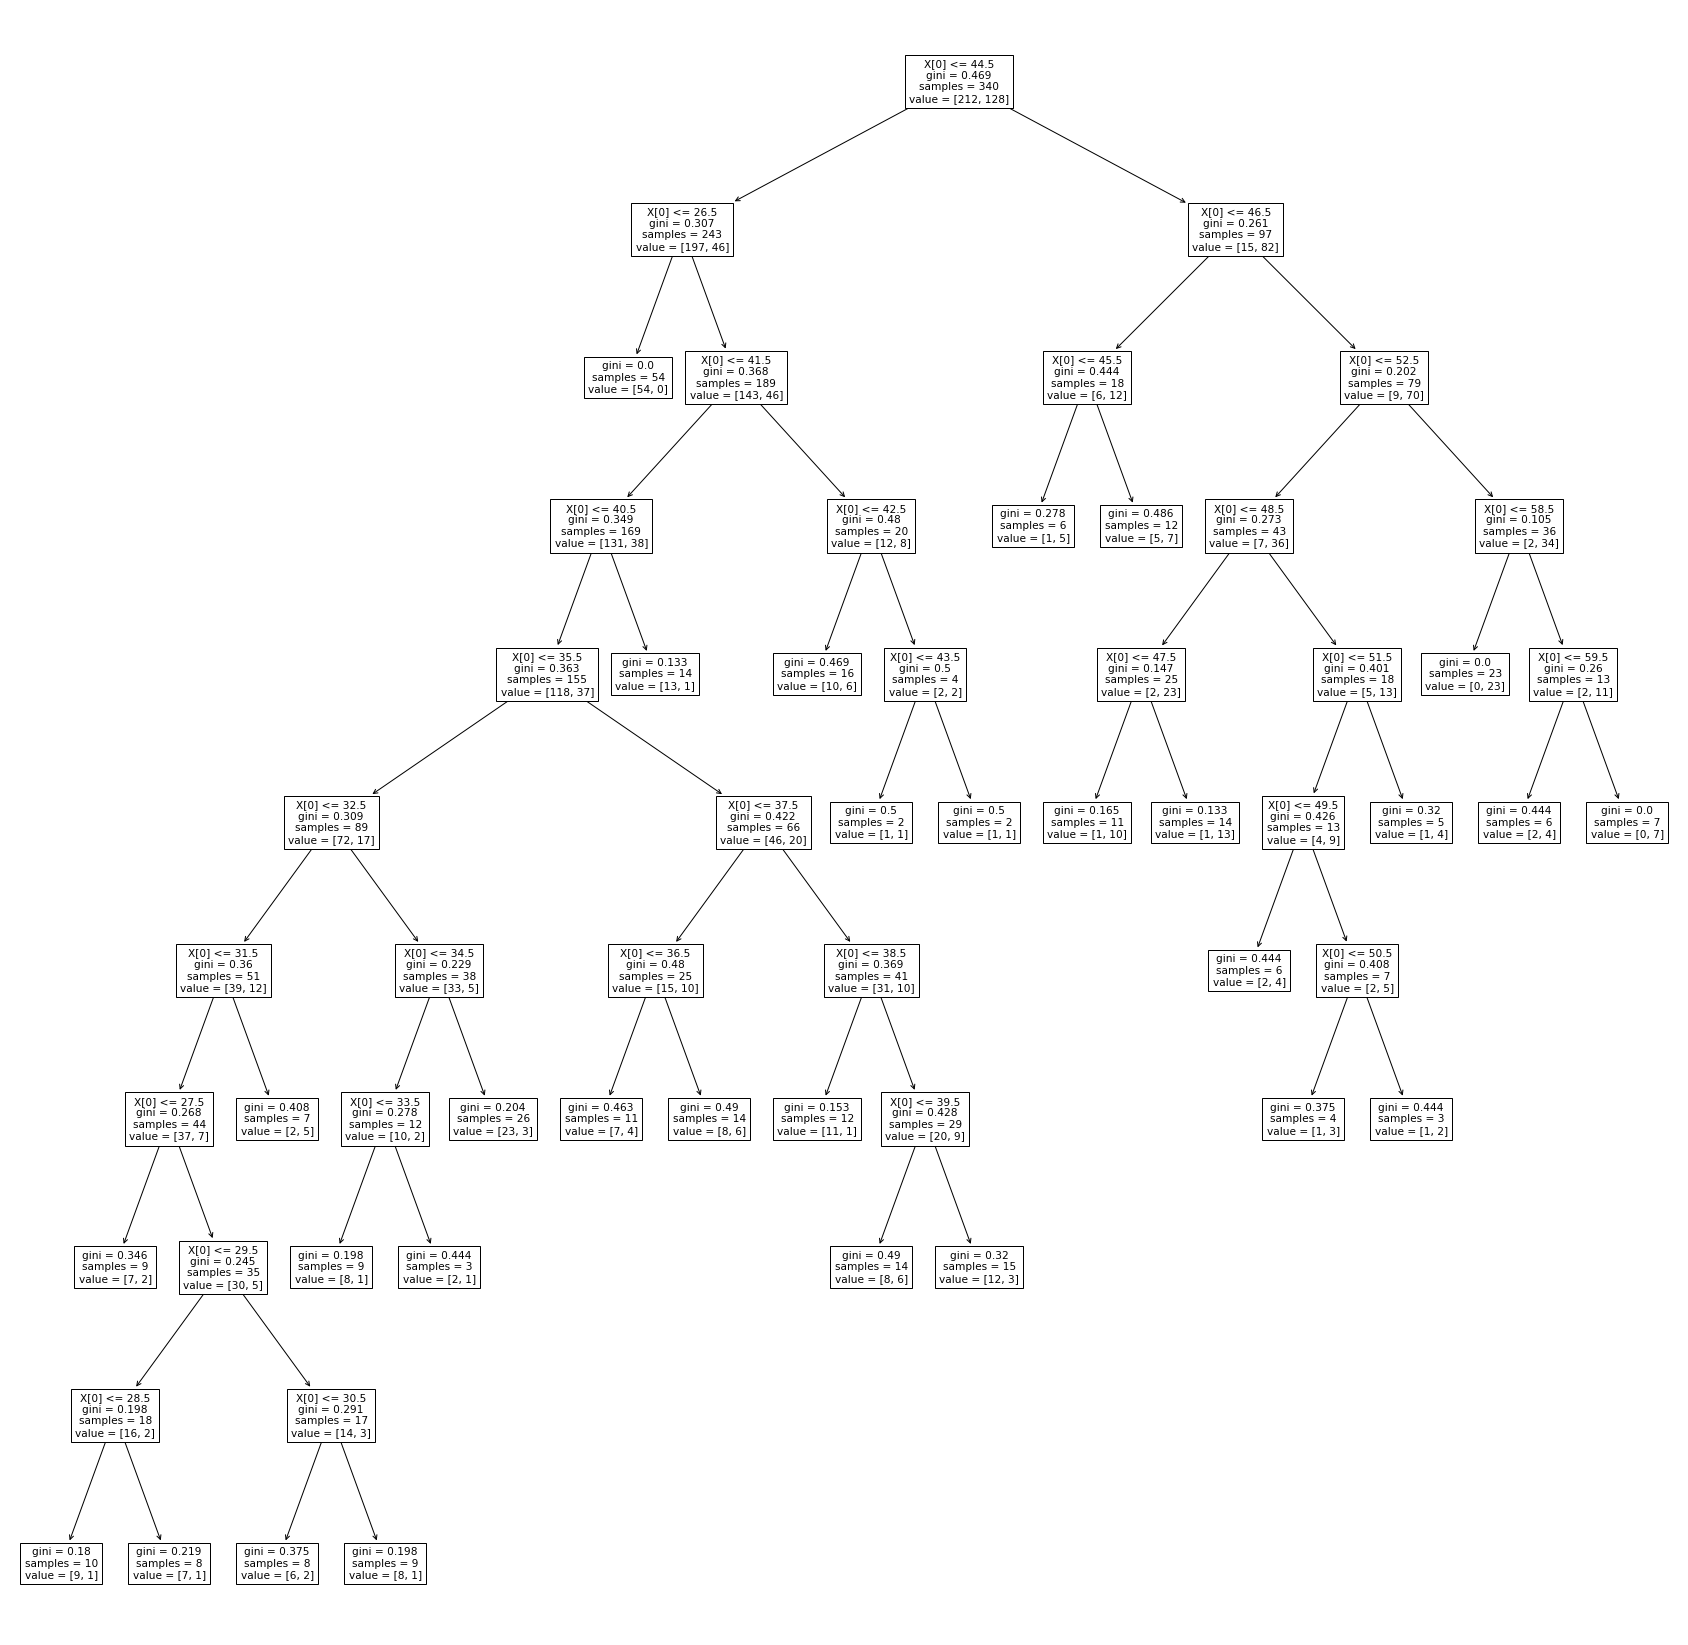

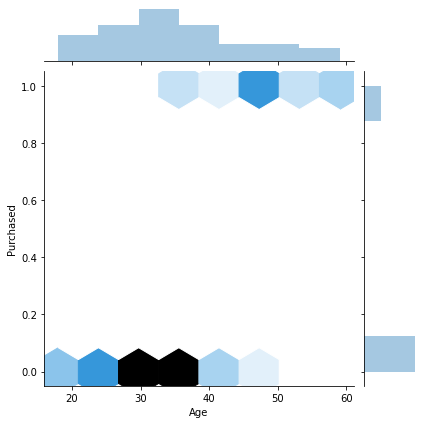

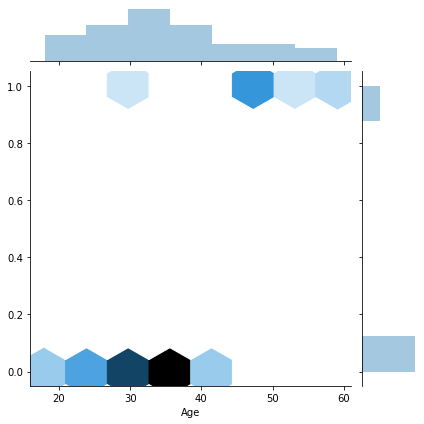

In [16]:
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier.fit(X_training_set.values.reshape(-1, 1), y_training_set)
dt_prediction = dt_classifier.predict(X_testing_set.values.reshape(-1, 1))

plt.figure(figsize = (30, 30))
tree.plot_tree(dt_classifier)

sns.jointplot(x = X_testing_set, y = y_testing_set, data = data, kind = 'hex')
sns.jointplot(x = X_testing_set, y = dt_prediction, data = data, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of Decision Tree Model: {}'.format(accuracy_score(y_testing_set, dt_prediction)))